# Unveiling Digital Inequality📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The project aims to address the issue of digital inequality, focusing on the gap between communities with access to reliable internet and digital technologies and those without. This topic is crucial due to the increasing reliance on digital platforms across various sectors like education, healthcare, and employment. The pandemic has exacerbated the divide, making it more urgent to find solutions for underprivileged communities at risk of exclusion.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

1. What are the primary factors contributing to digital inequality?

    Aim: To identify barriers such as geographic location, socioeconomic status, and availability of infrastructure.

2. Which demographics or communities are most affected by digital inequality?

    Aim: To uncover patterns and identify the most impacted regions, age groups, income brackets, or ethnicities.

3. How can technological interventions or policies help bridge the digital divide?

    Aim: To explore potential solutions like affordable internet access, public Wi-Fi initiatives, or community training programs and their effectiveness.

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

1. My hypothesized answer to this question would identify the main drivers of digital inequality, such as geographic barriers, socioeconomic factors, and disparities in infrastructure. The aim would be to detail how these factors create unequal access to reliable internet and digital technologies.

2. Here, my hypothesized answer would outline the specific communities impacted by digital inequality. It could describe patterns such as rural versus urban access, differences based on income, age, or race, and how these disparities affect access to opportunities like education and healthcare.

3. My hypothesized response to this question would explore potential solutions and interventions to address digital inequality. It would discuss how policy changes, affordable internet programs, community training, and public Wi-Fi access can contribute to narrowing the digital gap and ensuring more equitable access to digital resources.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
1. Pew Research Center (https://www.pewresearch.org/topic/internet-technology/technology-policy-issues/digital-divide/): Provides datasets on technology adoption, internet usage trends, and demographic information.

2. U.S. Census - American Community Survey (https://data.census.gov/all/tables?q=internet%20access): Provides demographic data, which can be combined with access to internet and technology usage statistics to form a more comprehensive picture.

3. FCC Broadband Map (https://broadbandmap.fcc.gov/): Contains U.S.-based broadband access and availability data, which can be tied to specific regions or zip codes. 


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

To address my project questions, the approach will involve multiple steps of data gathering, cleaning, and analysis. Each dataset will be loaded into a Python environment using libraries like Pandas for data manipulation, Matplotlib and Seaborn for visualization, and Geopandas if I need to add geographic mapping.

Data Collection and Preprocessing:
    The identified datasets from Pew Research, World Bank, FCC Broadband Map, and the U.S. Census will be imported. Each dataset will be cleaned to handle missing values, ensure uniform data formats, and standardize units across datasets. Key columns such as geographic location, demographic information, and internet access indicators will be retained for further analysis.

Exploratory Data Analysis (EDA):
    An initial exploratory analysis will be conducted to understand the data distribution and identify any patterns or correlations between variables. Visualizations like histograms, boxplots, and scatter plots will help reveal the relationships between factors like income level, education, and internet access. This will set the stage for more detailed analysis.

Combining Datasets for Analysis:
    The datasets will be merged based on common fields like geographic location (e.g., state, county) and demographic indicators. This integrated dataset will allow for a comprehensive view of how different variables contribute to digital inequality.

Analysis and Visualization:
    Using the combined dataset, analyses such as correlation tests, regression models, and clustering algorithms will be performed to answer the research questions. Visualizations like geographic heatmaps (to show regional disparities) and bar charts (to highlight disparities across demographics) will be created to present findings in a clear and digestible format.

Drawing Insights and Recommendations:
    The final step will be interpreting the results to draw insights on which factors are the most significant contributors to digital inequality and how specific demographics are affected. Based on these findings, actionable recommendations for policies or tech interventions to bridge the digital divide will be formulated.

## Machine Learning Plan
**What type of machine learning model are you planning to use?**
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

I plan to use Random Forest models as they are versatile and effective for both classification and regression tasks. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the class (classification) or mean prediction (regression) of the individual trees. It is particularly well-suited for datasets with mixed feature types (numerical and categorical) and provides robust performance on a wide range of problems.

**What are the challenges have you identified/are you anticipating in building your machine learning model?**
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

1. High Dimensionality: Some datasets have many features due to preprocessing (e.g., one-hot encoding), leading to increased memory usage and computation time.
2. Class Imbalance: Classification tasks may suffer from imbalanced target classes, which could skew the model's predictions.
3. Overfitting: Random Forest models can overfit when the number of trees is too high or when dealing with small datasets.
4. Handling Missing Data: Although we impute missing values during preprocessing, improper handling could still impact model performance.
5. Large Datasets: Processing and training on large datasets might lead to memory constraints or extended training times.

**How are you planning to address these challenges?**
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

1. Feature Selection/Dimensionality Reduction: Perform feature importance analysis using the Random Forest's built-in capabilities to reduce irrelevant features and optimize the model's performance.
2. Class Balancing: Use techniques like oversampling the minority class (e.g., SMOTE) or applying class weights in the Random Forest model to address imbalanced datasets.
3. Regularization: Tune hyperparameters such as the maximum depth of trees, number of trees, and minimum samples per leaf using grid search or random search to avoid overfitting.
4. Efficient Handling of Missing Data: Leverage robust imputation strategies during preprocessing and validate their effectiveness through cross-validation.
5. Chunked Processing: For large datasets, split the data into manageable chunks during preprocessing to ensure the process can run efficiently without exhausting memory.

In [4]:
# Start your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

In [78]:
welfare_data = pd.read_csv("data/National_Welfare_Distribution_Consumption.csv")
broadband_coverage = pd.read_csv("data/US_Broadband_Coverage_by_Area.csv", low_memory=False)
provider_deployment = pd.read_csv("data/US_Broadband_Provider_Technology_Deployment.csv")
income_stats = pd.read_csv("data/US_Income_Internet_Access_Statistics.csv")
mobile_tech = pd.read_csv("data/US_Mobile_Providers_Technology_Coverage.csv")

Visualizations

C:\Users\sburd\AppData\Local\Temp\ipykernel_5836\424794130.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3, 1].set_xticklabels(filtered_stats['Label (Grouping)'], rotation=45, ha='right')


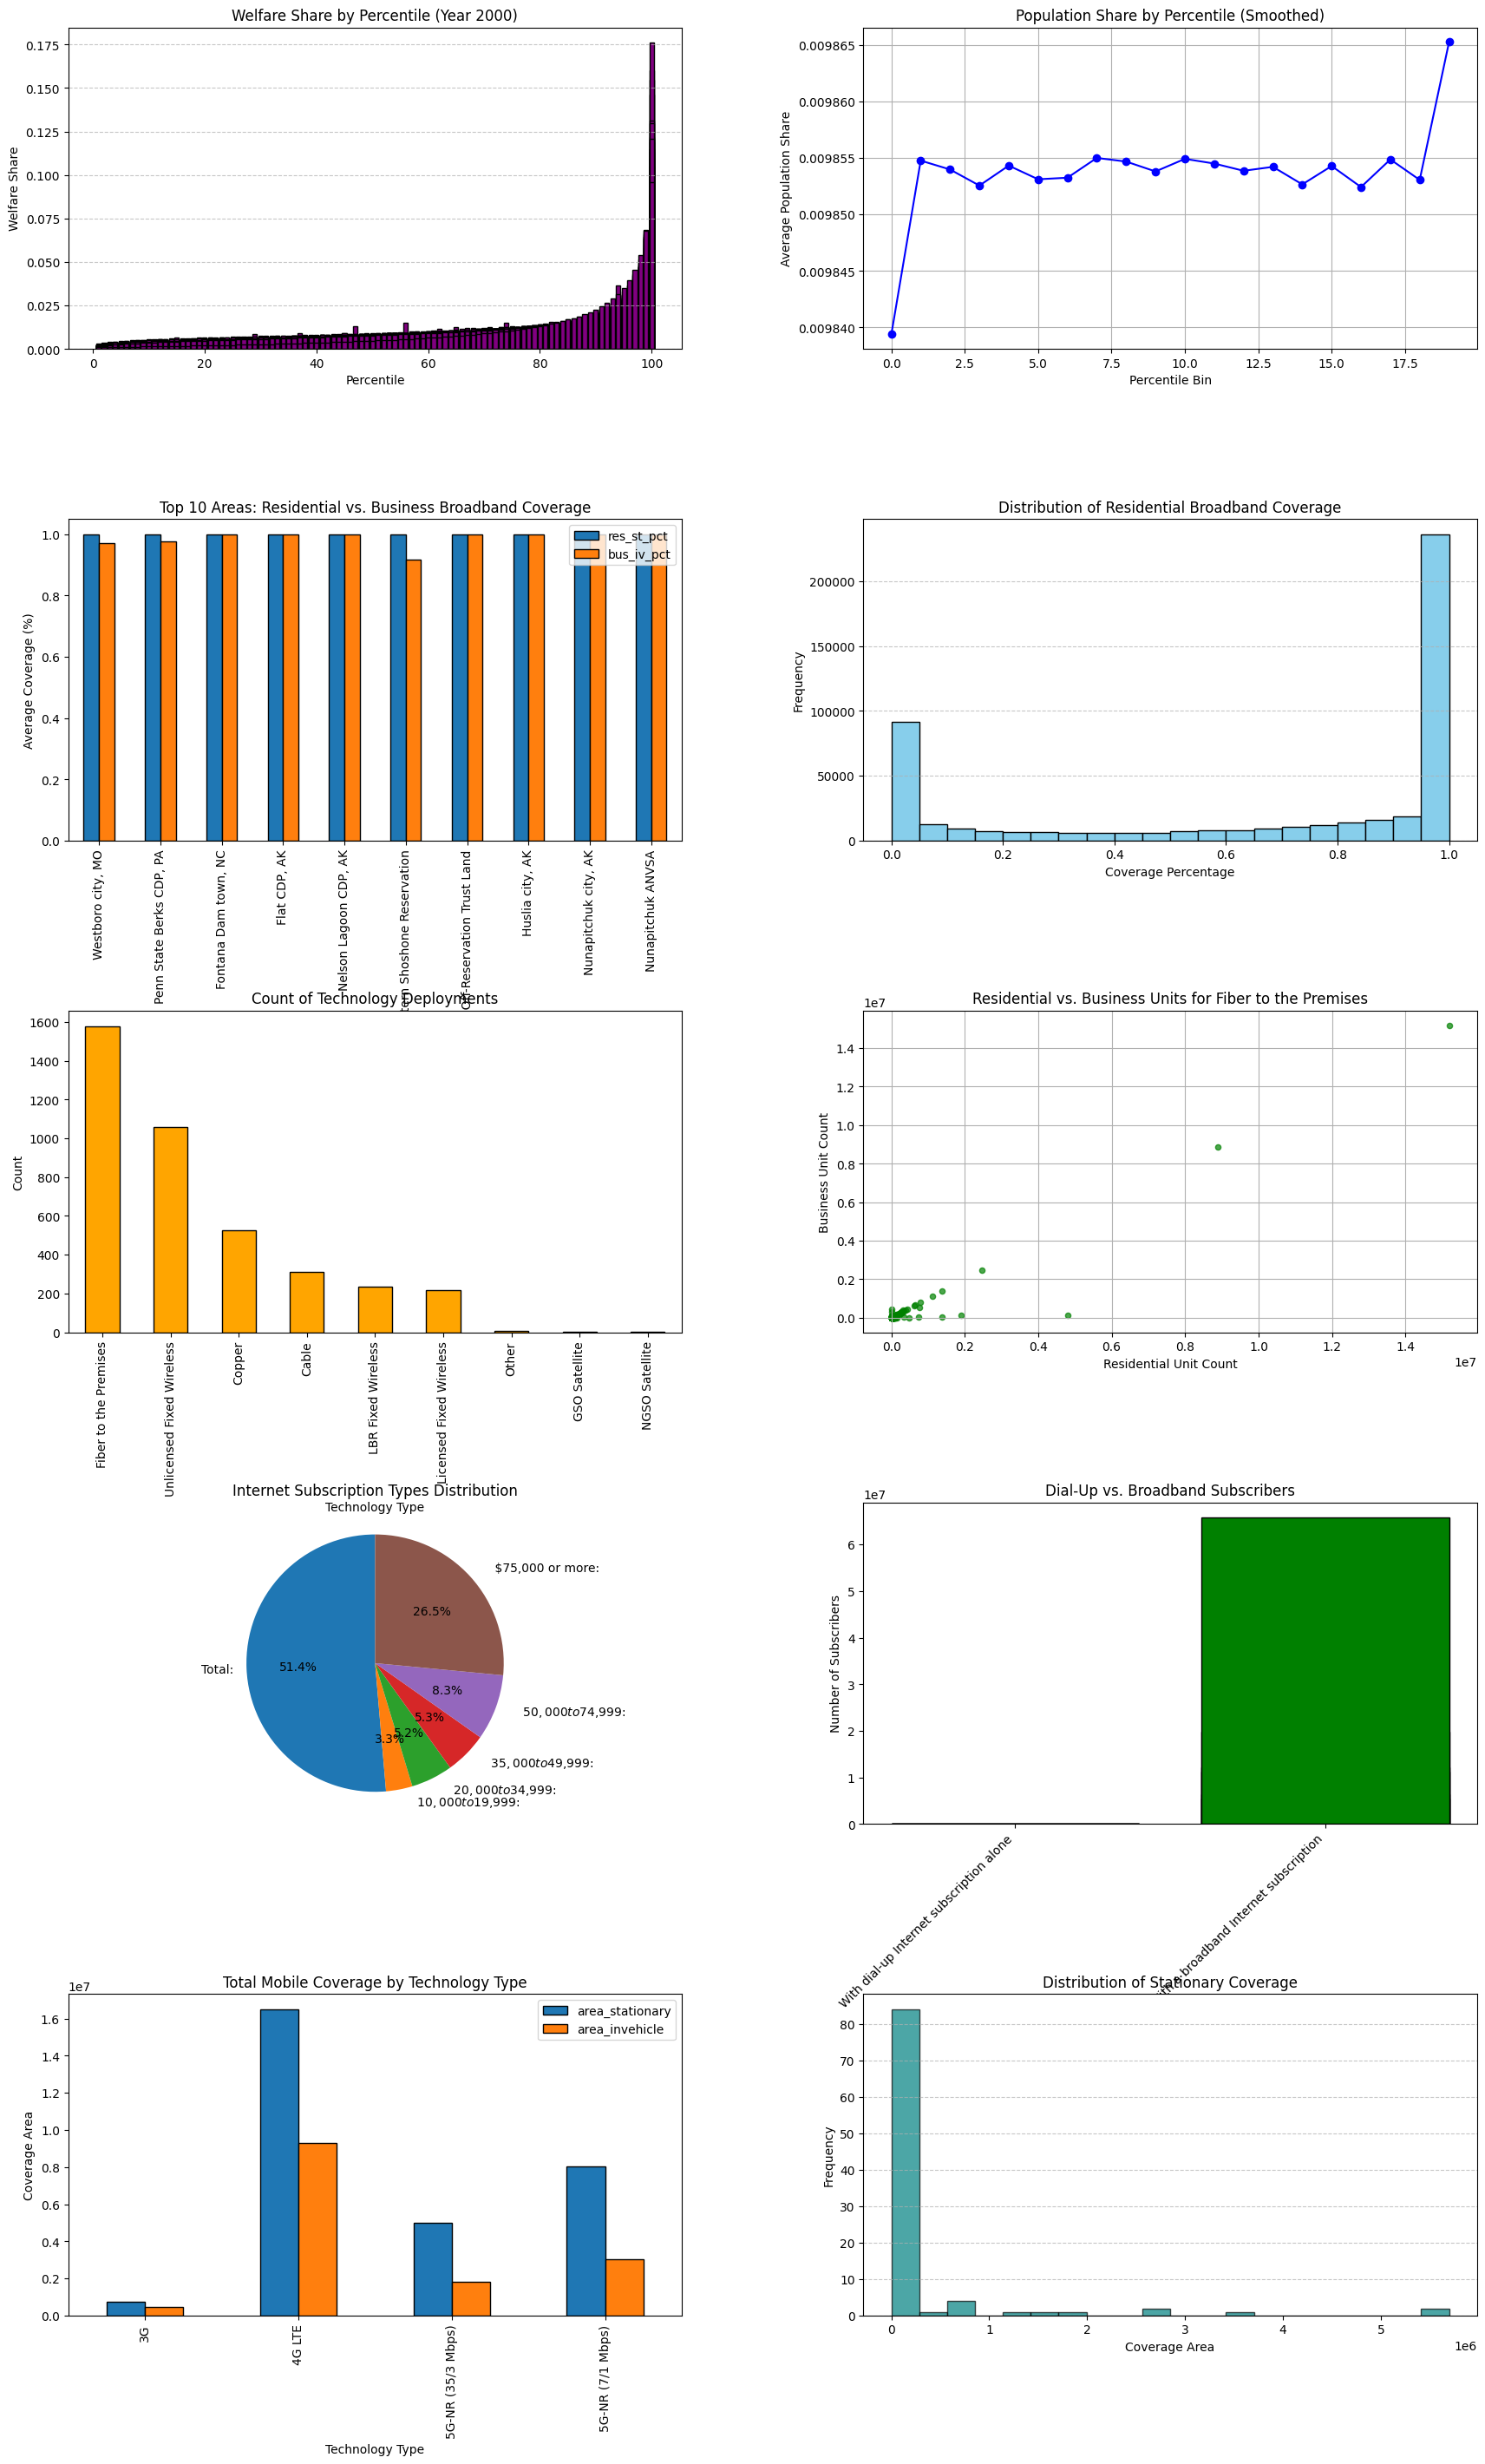

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
fig.tight_layout(pad=12)

subset = welfare_data[welfare_data['year'] == 2000]
axes[0, 0].bar(subset['percentile'], subset['welfare_share'], color='purple', edgecolor='black')
axes[0, 0].set_title('Welfare Share by Percentile (Year 2000)')
axes[0, 0].set_xlabel('Percentile')
axes[0, 0].set_ylabel('Welfare Share')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

welfare_data['percentile_bin'] = pd.cut(welfare_data['percentile'], bins=20, labels=False)
binned_data = welfare_data.groupby('percentile_bin')['pop_share'].mean()
axes[0, 1].plot(binned_data.index, binned_data, color='blue', marker='o')
axes[0, 1].set_title('Population Share by Percentile (Smoothed)')
axes[0, 1].set_xlabel('Percentile Bin')
axes[0, 1].set_ylabel('Average Population Share')
axes[0, 1].grid(True)

coverage_means = broadband_coverage.groupby('geography_desc')[['res_st_pct', 'bus_iv_pct']].mean().sort_values('res_st_pct', ascending=False).head(10)
coverage_means.plot(kind='bar', ax=axes[1, 0], edgecolor='black')
axes[1, 0].set_title('Top 10 Areas: Residential vs. Business Broadband Coverage')
axes[1, 0].set_ylabel('Average Coverage (%)')
axes[1, 0].set_xlabel('Geography Description')

axes[1, 1].hist(broadband_coverage['res_st_pct'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Distribution of Residential Broadband Coverage')
axes[1, 1].set_xlabel('Coverage Percentage')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

tech_counts = provider_deployment['technology_code_desc'].value_counts()
tech_counts.plot(kind='bar', ax=axes[2, 0], color='orange', edgecolor='black')
axes[2, 0].set_title('Count of Technology Deployments')
axes[2, 0].set_xlabel('Technology Type')
axes[2, 0].set_ylabel('Count')

fiber_data = provider_deployment[provider_deployment['technology_code_desc'] == 'Fiber to the Premises']
axes[2, 1].scatter(fiber_data['location_count_res'], fiber_data['location_count_bus'], alpha=0.7, color='green', s=20)
axes[2, 1].set_title('Residential vs. Business Units for Fiber to the Premises')
axes[2, 1].set_xlabel('Residential Unit Count')
axes[2, 1].set_ylabel('Business Unit Count')
axes[2, 1].grid(True)

numeric_income_stats = income_stats.copy()
numeric_income_stats['United States!!Estimate'] = numeric_income_stats['United States!!Estimate'].str.replace(',', '').astype(int)
subscription_types_corrected = numeric_income_stats.groupby('Label (Grouping)')['United States!!Estimate'].sum()
subscription_types_filtered = subscription_types_corrected.head(6)
subscription_types_filtered.plot(kind='pie', ax=axes[3, 0], autopct='%1.1f%%', startangle=90)
axes[3, 0].set_title('Internet Subscription Types Distribution')
axes[3, 0].set_ylabel('')

filtered_stats = income_stats[income_stats['Label (Grouping)'].str.contains("dial-up|broadband", case=False, na=False)].copy()
filtered_stats['United States!!Estimate'] = filtered_stats['United States!!Estimate'].str.replace(',', '').astype(int)
axes[3, 1].bar(filtered_stats['Label (Grouping)'], filtered_stats['United States!!Estimate'], color=['red', 'green'], edgecolor='black')
axes[3, 1].set_title('Dial-Up vs. Broadband Subscribers')
axes[3, 1].set_ylabel('Number of Subscribers')
axes[3, 1].set_xticklabels(filtered_stats['Label (Grouping)'], rotation=45, ha='right')

mobile_coverage_totals = mobile_tech.groupby('technology_code_desc')[['area_stationary', 'area_invehicle']].sum()
mobile_coverage_totals.plot(kind='bar', ax=axes[4, 0], edgecolor='black')
axes[4, 0].set_title('Total Mobile Coverage by Technology Type')
axes[4, 0].set_ylabel('Coverage Area')
axes[4, 0].set_xlabel('Technology Type')

axes[4, 1].hist(mobile_tech['area_stationary'], bins=20, color='teal', edgecolor='black', alpha=0.7)
axes[4, 1].set_title('Distribution of Stationary Coverage')
axes[4, 1].set_xlabel('Coverage Area')
axes[4, 1].set_ylabel('Frequency')
axes[4, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Fixed missing values, duplicates, anomalies and other outliers

In [ ]:
welfare_data.isnull().sum()
welfare_data.duplicated().sum()

welfare_data.ffill(inplace=True)

welfare_data['year'] = welfare_data['year'].astype(int)
welfare_data['percentile'] = welfare_data['percentile'].astype(float)
welfare_data['avg_welfare'] = welfare_data['avg_welfare'].astype(float)

broadband_coverage.isnull().sum()
broadband_coverage.duplicated().sum()

broadband_coverage = broadband_coverage.dropna(subset=['res_st_pct', 'bus_iv_pct'])

broadband_coverage['res_st_pct'] = broadband_coverage['res_st_pct'].astype(float)
broadband_coverage['bus_iv_pct'] = broadband_coverage['bus_iv_pct'].astype(float)

provider_deployment.isnull().sum()
provider_deployment.duplicated().sum()

provider_deployment.fillna({'location_count_res': 0, 'location_count_bus': 0}, inplace=True)

provider_deployment['location_count_res'] = provider_deployment['location_count_res'].astype(int)
provider_deployment['location_count_bus'] = provider_deployment['location_count_bus'].astype(int)

income_stats.isnull().sum()
income_stats.duplicated().sum()

income_stats = income_stats.dropna(subset=['United States!!Estimate'])

income_stats['United States!!Estimate'] = income_stats['United States!!Estimate'].str.replace(',', '').astype(float)

mobile_tech.isnull().sum()
mobile_tech.duplicated().sum()

mobile_tech.fillna({'area_stationary': 0, 'area_invehicle': 0}, inplace=True)

mobile_tech['area_stationary'] = mobile_tech['area_stationary'].astype(float)
mobile_tech['area_invehicle'] = mobile_tech['area_invehicle'].astype(float)

Exploratory Data Analysis

In [15]:
print(welfare_data.head())
print(broadband_coverage.head())
print(provider_deployment.head())
print(income_stats.head())
print(mobile_tech.head())

print(welfare_data.info())
print(broadband_coverage.info())
print(provider_deployment.info())
print(income_stats.info())
print(mobile_tech.info())

print(welfare_data.describe())
print(broadband_coverage.describe())
print(provider_deployment.describe())
print(income_stats.describe())
print(mobile_tech.describe())

print("Missing values:")
print(welfare_data.isnull().sum())
print(broadband_coverage.isnull().sum())
print(provider_deployment.isnull().sum())
print(income_stats.isnull().sum())
print(mobile_tech.isnull().sum())

  country_code  year reporting_level welfare_type  percentile  avg_welfare  \
0          AGO  2000        national  consumption           1     0.252806   
1          AGO  2000        national  consumption           2     0.352954   
2          AGO  2000        national  consumption           3     0.486537   
3          AGO  2000        national  consumption           4     0.609817   
4          AGO  2000        national  consumption           5     0.712075   

   pop_share  welfare_share  quantile           pop  
0   0.009531       0.000326  0.273043  52050.818563  
1   0.010332       0.000494  0.416977  56420.872945  
2   0.009986       0.000658  0.551534  54534.384848  
3   0.010128       0.000836  0.671796  55309.016853  
4   0.009507       0.000916  0.748645  51917.144176  
  geography_type geography_id           geography_desc        data_type  \
0     CBSA (MSA)        10100  Aberdeen, SD Micro Area  Fixed Broadband   
1     CBSA (MSA)        10100  Aberdeen, SD Micro Area  F

In [ ]:
preprocessed_datasets = {}

for name, data in datasets.items():
    print(f"Processing {name}...")

    numeric_features = data.select_dtypes(include=["int64", "float64"]).columns
    categorical_features = data.select_dtypes(include=["object", "category"]).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    for cat_col in categorical_features:
        label_encoder = LabelEncoder()
        data[cat_col] = label_encoder.fit_transform(data[cat_col].fillna("missing"))

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=10))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    preprocessed_data = preprocessor.fit_transform(data)

    encoded_categories = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(
        categorical_features
    ) if len(categorical_features) > 0 else []

    all_columns = list(numeric_features) + list(encoded_categories)

    preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_columns)

    preprocessed_datasets[name] = preprocessed_df

    print(f"Finished preprocessing {name}.\n")

print(preprocessed_datasets["welfare_data"].head())
print(preprocessed_datasets["broadband_coverage"].head())
print(preprocessed_datasets["provider_deployment"].head())
print(preprocessed_datasets["income_stats"].head())
print(preprocessed_datasets["mobile_tech"].head())

Processing welfare_data...
Finished preprocessing welfare_data.

Processing broadband_coverage...
Finished preprocessing broadband_coverage.

Processing provider_deployment...
Finished preprocessing provider_deployment.

Processing income_stats...
Finished preprocessing income_stats.

Processing mobile_tech...
Finished preprocessing mobile_tech.

   country_code      year  reporting_level  welfare_type  percentile  \
0     -1.633935 -0.571221        -0.230953     -1.218996   -1.714799   
1     -1.633935 -0.571221        -0.230953     -1.218996   -1.680156   
2     -1.633935 -0.571221        -0.230953     -1.218996   -1.645514   
3     -1.633935 -0.571221        -0.230953     -1.218996   -1.610871   
4     -1.633935 -0.571221        -0.230953     -1.218996   -1.576229   

   avg_welfare  pop_share  welfare_share  quantile       pop  
0    -0.766386  -0.352155      -1.033820 -0.846477 -0.340144  
1    -0.763071   0.521974      -1.015654 -0.841039 -0.337824  
2    -0.758649   0.144625    

Splitting the Datasets

In [31]:
train_test_splits = {}

for name, data in preprocessed_datasets.items():
    print(f"Performing train-test split for {name}...")
    
    if data.shape[1] > 1:
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
    else:
        raise ValueError(f"Dataset {name} has only one column; cannot perform train-test split.")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_test_splits[name] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }
    
    print(f"Finished splitting {name}.\n")


train_test_welfare_data_dataset = "welfare_data"
print("Train-Test Split for:", train_test_welfare_data_dataset)
print("X_train Shape:", train_test_splits[train_test_welfare_data_dataset]["X_train"].shape)
print("X_test Shape:", train_test_splits[train_test_welfare_data_dataset]["X_test"].shape)
print("y_train Shape:", train_test_splits[train_test_welfare_data_dataset]["y_train"].shape)
print("y_test Shape:", train_test_splits[train_test_welfare_data_dataset]["y_test"].shape)

train_test_broadband_coverage_dataset = "broadband_coverage"
print("Train-Test Split for:", train_test_broadband_coverage_dataset)
print("X_train Shape:", train_test_splits[train_test_broadband_coverage_dataset]["X_train"].shape)
print("X_test Shape:", train_test_splits[train_test_broadband_coverage_dataset]["X_test"].shape)
print("y_train Shape:", train_test_splits[train_test_broadband_coverage_dataset]["y_train"].shape)
print("y_test Shape:", train_test_splits[train_test_broadband_coverage_dataset]["y_test"].shape)

train_test_provider_deployment_dataset = "provider_deployment"
print("Train-Test Split for:", train_test_provider_deployment_dataset)
print("X_train Shape:", train_test_splits[train_test_provider_deployment_dataset]["X_train"].shape)
print("X_test Shape:", train_test_splits[train_test_provider_deployment_dataset]["X_test"].shape)
print("y_train Shape:", train_test_splits[train_test_provider_deployment_dataset]["y_train"].shape)
print("y_test Shape:", train_test_splits[train_test_provider_deployment_dataset]["y_test"].shape)

train_test_income_stats_dataset = "income_stats"
print("Train-Test Split for:", train_test_income_stats_dataset)
print("X_train Shape:", train_test_splits[train_test_income_stats_dataset]["X_train"].shape)
print("X_test Shape:", train_test_splits[train_test_income_stats_dataset]["X_test"].shape)
print("y_train Shape:", train_test_splits[train_test_income_stats_dataset]["y_train"].shape)
print("y_test Shape:", train_test_splits[train_test_income_stats_dataset]["y_test"].shape)

train_test_mobile_tech_dataset = "mobile_tech"
print("Train-Test Split for:", train_test_mobile_tech_dataset)
print("X_train Shape:", train_test_splits[train_test_mobile_tech_dataset]["X_train"].shape)
print("X_test Shape:", train_test_splits[train_test_mobile_tech_dataset]["X_test"].shape)
print("y_train Shape:", train_test_splits[train_test_mobile_tech_dataset]["y_train"].shape)
print("y_test Shape:", train_test_splits[train_test_mobile_tech_dataset]["y_test"].shape)


Performing train-test split for welfare_data...
Finished splitting welfare_data.

Performing train-test split for broadband_coverage...
Finished splitting broadband_coverage.

Performing train-test split for provider_deployment...
Finished splitting provider_deployment.

Performing train-test split for income_stats...
Finished splitting income_stats.

Performing train-test split for mobile_tech...
Finished splitting mobile_tech.

Train-Test Split for: welfare_data
X_train Shape: (196473, 9)
X_test Shape: (49119, 9)
y_train Shape: (196473,)
y_test Shape: (49119,)
Train-Test Split for: broadband_coverage
X_train Shape: (398733, 6)
X_test Shape: (99684, 6)
y_train Shape: (398733,)
y_test Shape: (99684,)
Train-Test Split for: provider_deployment
X_train Shape: (3152, 7)
X_test Shape: (788, 7)
y_train Shape: (3152,)
y_test Shape: (788,)
Train-Test Split for: income_stats
X_train Shape: (20, 2)
X_test Shape: (5, 2)
y_train Shape: (20,)
y_test Shape: (5,)
Train-Test Split for: mobile_tech
X_t

Random Forest Models Display

In [ ]:
models_and_results = {}

for name, splits in train_test_splits.items():
    print(f"Training Random Forest model for {name}...")

    # Extract train-test splits
    X_train = splits["X_train"]
    X_test = splits["X_test"]
    y_train = splits["y_train"]
    y_test = splits["y_test"]

    if len(y_train.unique()) <= 20:
        model = RandomForestClassifier(random_state=42, n_estimators=100)
        task_type = "classification"
    else:
        model = RandomForestRegressor(random_state=42, n_estimators=100)
        task_type = "regression"


    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    if task_type == "classification":
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {name}: {accuracy:.2f}")
        models_and_results[name] = {
            "pipeline": pipeline,
            "task_type": task_type,
            "accuracy": accuracy,
        }
    else:
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error for {name}: {mse:.2f}")
        models_and_results[name] = {
            "pipeline": pipeline,
            "task_type": task_type,
            "mse": mse,
        }

    print(f"Finished training and evaluating model for {name}.\n")

example_dataset = "welfare_data"
if example_dataset in models_and_results:
    print(f"Results for {example_dataset}:")
    print(models_and_results[example_dataset])
else:
    print(f"No model results found for {example_dataset}.")

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [80]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot trust

Jupyter command `jupyter-nbconvert` not found.
